In [ ]:
# 🎯 Objective
# Show why Gradient Descent fails without scaling.

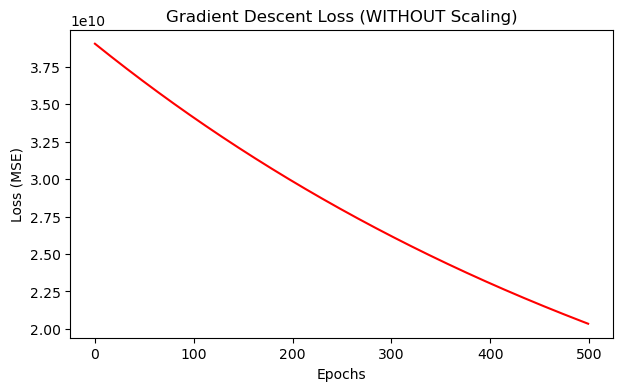

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("train.csv")

FEATURES = [
    "GrLivArea",
    "OverallQual",
    "TotalBsmtSF",
    "GarageCars",
    "YearBuilt",
    "SalePrice"
]

df = df[FEATURES]
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)

X = df.drop("SalePrice", axis=1).values
y = df["SalePrice"].values.reshape(-1,1)

X = np.c_[np.ones(X.shape[0]), X]

def gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []

    for i in range(epochs):
        error = np.dot(X, theta) - y
        losses.append(np.mean(error**2))
        theta -= (lr/m) * np.dot(X.T, error)

    return theta, losses

theta_raw, loss_raw = gradient_descent(X, y, lr=1e-10, epochs=500)
y_pred_raw = np.dot(X, theta_raw)

# Loss plot (FAILURE)
plt.figure(figsize=(7,4))
plt.plot(loss_raw, color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent Loss (WITHOUT Scaling)")
plt.show()
